In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
jaxadi_results = np.load("jaxadi_benchmark_results.npz")
cusadi_results = np.load("cuda_benchmark_results.npz")

jaxadi_results = dict(jaxadi_results)
cusadi_results = dict(cusadi_results)

In [3]:
# Extracting data
jaxadi_fn_1e1 = np.array(jaxadi_results['fn_1e1'])
jaxadi_fn_1e2 = np.array(jaxadi_results['fn_1e2'])
cusadi_fn_1e1 = np.array(cusadi_results['fn_1e1'])
cusadi_fn_1e2 = np.array(cusadi_results['fn_1e2'])

In [4]:
# Function to flatten arrays for CDF and scatter plots
def flatten(arr):
    return np.array([item for sublist in arr for item in sublist])

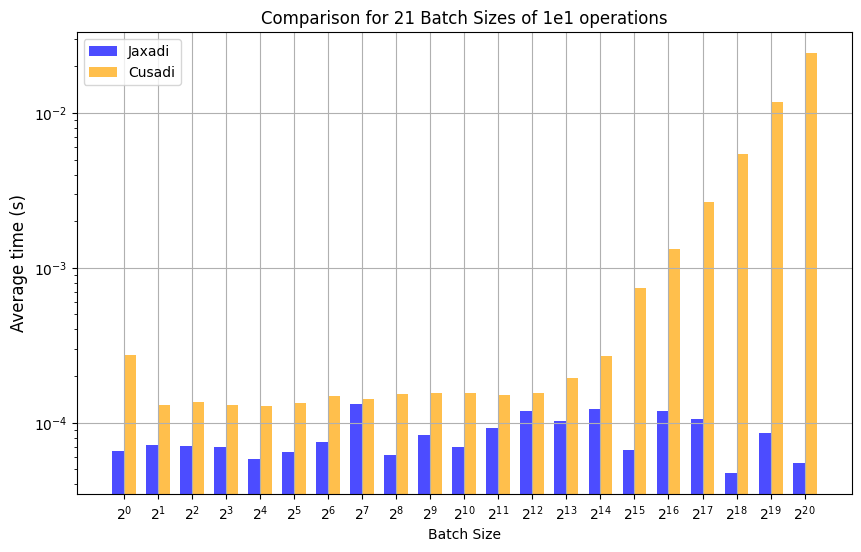

In [5]:

# Assuming `jaxadi_results` and `cusadi_results` are your dictionaries with 'fn_1e1' and 'N_ENVS'

# Extracting data
jaxadi_fn_1e1 = np.array(jaxadi_results['fn_1e1'])  # Shape (21, 20)
cusadi_fn_1e1 = np.array(cusadi_results['fn_1e1'])  # Shape (21, 20)
batch_sizes = ['$2^{' + f'{i}' + '}$' for i in range(21)]  # Assuming N_ENVS contains the 20 batch sizes

# Calculate the mean evaluation time for each batch size (across the 21 evaluations)
mean_jaxadi_1e1 = jaxadi_fn_1e1.mean(axis=1)  # Averaging across the evaluations for each batch size
mean_cusadi_1e1 = cusadi_fn_1e1.mean(axis=1)  # Same for cusadi

# Editable parameter: how many batch sizes to show (set this to your preferred number)
num_batches_to_plot = 21  # Change this number to plot fewer or more batch sizes

# Limit the data to the specified number of batch sizes
mean_jaxadi_1e1 = mean_jaxadi_1e1[:num_batches_to_plot]
mean_cusadi_1e1 = mean_cusadi_1e1[:num_batches_to_plot]
batch_sizes_to_plot = batch_sizes[:num_batches_to_plot]

# Set the width of the bars
bar_width = 0.35

# Plot the overlay of bars, with slight shifts for visibility
plt.figure(figsize=(10, 6))
plt.bar(np.arange(num_batches_to_plot) - bar_width / 2, mean_jaxadi_1e1, width=bar_width, label='Jaxadi', alpha=0.7, color='blue')
plt.bar(np.arange(num_batches_to_plot) + bar_width / 2, mean_cusadi_1e1, width=bar_width, label='Cusadi', alpha=0.7, color='orange')

# Properly label the x-axis with batch sizes
plt.xticks(np.arange(num_batches_to_plot), batch_sizes_to_plot)

# Add labels and title
plt.xlabel('Batch Size')
plt.ylabel('Average time (s)', fontsize=12)
plt.title(f'Comparison for {num_batches_to_plot} Batch Sizes of 1e1 operations')
plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

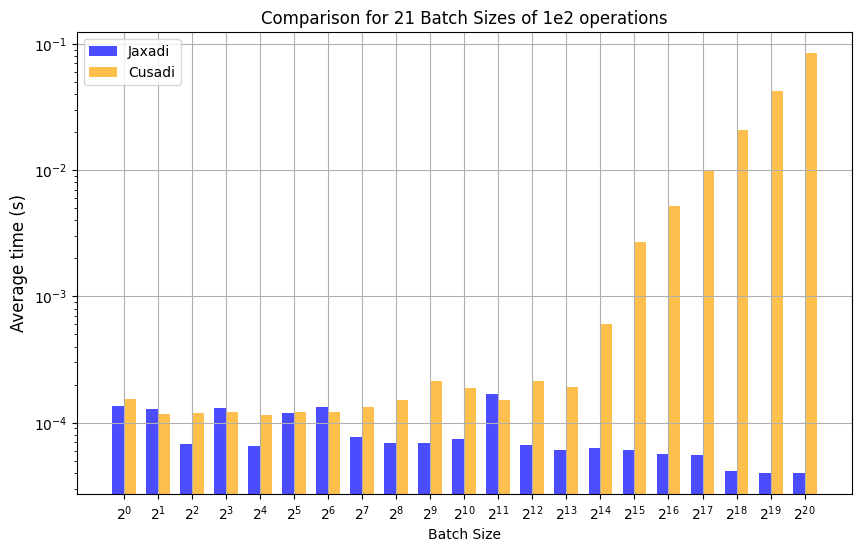

In [6]:

# Assuming `jaxadi_results` and `cusadi_results` are your dictionaries with 'fn_1e1' and 'N_ENVS'

# Extracting data
jaxadi_fn_1e2 = np.array(jaxadi_results['fn_1e2'])  # Shape (21, 20)
cusadi_fn_1e2 = np.array(cusadi_results['fn_1e2'])  # Shape (21, 20)
batch_sizes = ['$2^{' + f'{i}' + '}$' for i in range(21)]  # Assuming N_ENVS contains the 20 batch sizes

# Calculate the mean evaluation time for each batch size (across the 21 evaluations)
mean_jaxadi_1e2 = jaxadi_fn_1e2.mean(axis=1)  # Averaging across the evaluations for each batch size
mean_cusadi_1e2 = cusadi_fn_1e2.mean(axis=1)  # Same for cusadi

# Editable parameter: how many batch sizes to show (set this to your preferred number)
num_batches_to_plot = 21 # Change this number to plot fewer or more batch sizes

# Limit the data to the specified number of batch sizes
mean_jaxadi_1e2 = mean_jaxadi_1e2[:num_batches_to_plot]
mean_cusadi_1e2 = mean_cusadi_1e2[:num_batches_to_plot]
batch_sizes_to_plot = batch_sizes[:num_batches_to_plot]

# Set the width of the bars
bar_width = 0.35

# Plot the overlay of bars, with slight shifts for visibility
plt.figure(figsize=(10, 6))
plt.bar(np.arange(num_batches_to_plot) - bar_width / 2, mean_jaxadi_1e2, width=bar_width, label='Jaxadi', alpha=0.7, color='blue')
plt.bar(np.arange(num_batches_to_plot) + bar_width / 2, mean_cusadi_1e2, width=bar_width, label='Cusadi', alpha=0.7, color='orange')

# Properly label the x-axis with batch sizes
plt.xticks(np.arange(num_batches_to_plot), batch_sizes_to_plot)

# Add labels and title
plt.xlabel('Batch Size')
# Change the y-axis label
plt.ylabel('Average time (s)', fontsize=12)

plt.title(f'Comparison for {num_batches_to_plot} Batch Sizes of 1e2 operations')
plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

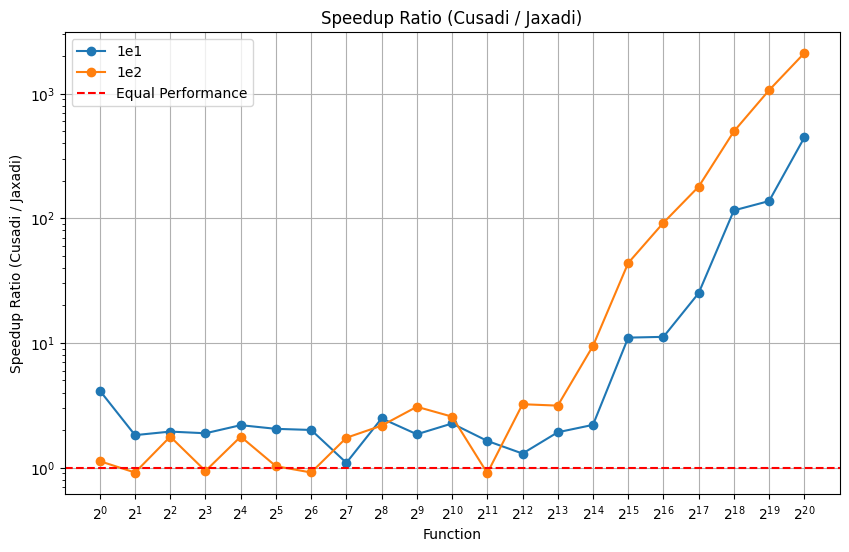

In [7]:
# 3. Speedup Ratio Plot (cusadi_time / jaxadi_time)
speedup_ratio1 = mean_cusadi_1e1 / mean_jaxadi_1e1
speedup_ratio2 = mean_cusadi_1e2 / mean_jaxadi_1e2
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, speedup_ratio1, marker='o', label='1e1')
plt.plot(batch_sizes, speedup_ratio2, marker='o', label='1e2')
plt.axhline(1, color='red', linestyle='--', label='Equal Performance')
plt.xlabel('Function')
plt.ylabel('Speedup Ratio (Cusadi / Jaxadi)')
plt.title('Speedup Ratio (Cusadi / Jaxadi)')
plt.legend()
plt.yscale('log')
plt.grid()
plt.show()